# Laboratory practice № 7 (Controlability and observability)

Done by Novichkov Dmitriy

Variant: 8

## Preparation

In [36]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
from matplotlib.ticker import FormatStrFormatter
import scipy
import scipy.integrate as si
import scipy.linalg as la


dt = 1e-3
t = sympy.symbols("t",real=True)

def grammian_cont_scipy(A, B, t_final, num_steps=1000):
    ts = np.linspace(0, t_final, num_steps)
    dt = ts[1] - ts[0]
    G = np.zeros((A.shape[0], A.shape[0]))
    for t in ts:
        # expm(A*t)
        eAt = la.expm(A*t)
        G += eAt @ B @ B.T @ eAt.T * dt
    return G

def grammian_cont(a, b, t_1):
    return sympy.integrate(sympy.exp(a*t) @ b @ b.T @ sympy.exp(a.T*t),(t,0,t_1))

def grammian_obs_sympy(a, c, t_1):
    return sympy.integrate(sympy.exp(a.T*t) @ c.T @ c @ sympy.exp(a*t),(t,0,t_1))

def grammian_obs_scipy(a, c, t_1):
    func = lambda x : scipy.linalg.expm(a.T*x) @ c.T @ c @ scipy.linalg.expm(a*x)
    return scipy.integrate.quad_vec(func,0,t_1)

## Task 1 (Research controllability)

In [23]:
A = np.array([
    [0, 4, 2],
    [-4, -8, -4],
    [4, 4, 0]
])

B = np.array([
    [-3],
    [5],
    [-2]
])

x_1 = np.array([
    [-4],
    [0],
    [0]
])

### Subtask 1.1

In [24]:
U = np.concatenate([B, A.dot(B), A.dot(A.dot(B))],axis=1)
U

array([[ -3,  16, -64],
       [  5, -20,  64],
       [ -2,   8, -16]])

In [25]:
np.linalg.matrix_rank(U)

3

Rank of controllability matrix is n, so the system is fully contrallable

### Subtask 1.2

In [26]:
eigenvalues, eigenvectors = scipy.linalg.eig(A)

print("Eigen values matrix A:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"λ_{i+1} = {eigenvalue}")

for i, eigenvalue in enumerate(eigenvalues):
    H = np.hstack((A - eigenvalue * np.eye(3), B))
    rank = np.linalg.matrix_rank(H)
    
    print(f"\nMatrix Hautus for λ_{i+1} = {eigenvalue}:")
    print(H)
    print(f"Rank matrix Hautus: {rank}")
    
    if rank == 3:
        print(f"System is contrallable for λ_{i+1} = {eigenvalue}.")
    else:
        print(f"System is not controllable for λ_{i+1} = {eigenvalue}.")

Eigen values matrix A:
λ_1 = (-1.9999999999999991+2.0000000000000036j)
λ_2 = (-1.9999999999999991-2.0000000000000036j)
λ_3 = (-3.999999999999999+0j)

Matrix Hautus for λ_1 = (-1.9999999999999991+2.0000000000000036j):
[[ 2.-2.j  4.+0.j  2.+0.j -3.+0.j]
 [-4.+0.j -6.-2.j -4.+0.j  5.+0.j]
 [ 4.+0.j  4.+0.j  2.-2.j -2.+0.j]]
Rank matrix Hautus: 3
System is contrallable for λ_1 = (-1.9999999999999991+2.0000000000000036j).

Matrix Hautus for λ_2 = (-1.9999999999999991-2.0000000000000036j):
[[ 2.+2.j  4.+0.j  2.+0.j -3.+0.j]
 [-4.+0.j -6.+2.j -4.+0.j  5.+0.j]
 [ 4.+0.j  4.+0.j  2.+2.j -2.+0.j]]
Rank matrix Hautus: 3
System is contrallable for λ_2 = (-1.9999999999999991-2.0000000000000036j).

Matrix Hautus for λ_3 = (-3.999999999999999+0j):
[[ 4.+0.j  4.+0.j  2.+0.j -3.+0.j]
 [-4.+0.j -4.+0.j -4.+0.j  5.+0.j]
 [ 4.+0.j  4.+0.j  4.+0.j -2.+0.j]]
Rank matrix Hautus: 3
System is contrallable for λ_3 = (-3.999999999999999+0j).


In [27]:
A_sym = sympy.Matrix(A)
B_sym = sympy.Matrix(B)
P, J = A_sym.jordan_form()
J

Matrix([
[-4,        0,        0],
[ 0, -2 - 2*I,        0],
[ 0,        0, -2 + 2*I]])

In [28]:
P

Matrix([
[-1, 1/2 - I/2, 1/2 + I/2],
[ 1,        -1,        -1],
[ 0,         1,         1]])

### Subtask 1.3

In [29]:
for eigenvalue in eigenvalues:
    H = np.hstack((A - eigenvalue * np.eye(3), B))
    rank = np.linalg.matrix_rank(H)

    print(f"Rank matrix Hautus for λ = {eigenvalue}: {rank}")
    
    if rank == 3:
        print(f"System is contrallable for λ_{i+1} = {eigenvalue}.")
    else:
        print(f"System is not controllable for λ_{i+1} = {eigenvalue}.")

Rank matrix Hautus for λ = (-1.9999999999999991+2.0000000000000036j): 3
System is contrallable for λ_3 = (-1.9999999999999991+2.0000000000000036j).
Rank matrix Hautus for λ = (-1.9999999999999991-2.0000000000000036j): 3
System is contrallable for λ_3 = (-1.9999999999999991-2.0000000000000036j).
Rank matrix Hautus for λ = (-3.999999999999999+0j): 3
System is contrallable for λ_3 = (-3.999999999999999+0j).


In [30]:
P.inv() @ B_sym

Matrix([
[     3],
[-1 + I],
[-1 - I]])

Since all elements of $P^{-1} B$ are not equal to zero, the system is completely controllable

### Subtask 2

In [37]:
G_cont = grammian_cont_scipy(A_sym, B_sym, 3)
G_cont.simplify()
G_cont

Matrix([
[ 0.78858470919066, -1.44762725171535, 0.609050612120818],
[-1.44762725171535,  2.86268266575423, -1.11506997747346],
[0.609050612120818, -1.11506997747346, 0.506024910306008]])

In [38]:
G_cont.evalf()

Matrix([
[ 0.78858470919066, -1.44762725171535, 0.609050612120818],
[-1.44762725171535,  2.86268266575423, -1.11506997747346],
[0.609050612120818, -1.11506997747346, 0.506024910306008]])

In [39]:
G_cont.evalf().eigenvals()

{4.06032138868100: 1, 0.0179537692389094: 1, 0.0790171273309859: 1}

In [40]:
G_cont.evalf().det()

0.00576019633603608

All gramian eigenvalues of controllability are positive, which indicates that the system is controllable

### Subtask 3

In [41]:
x_1_sym = sympy.Matrix(x_1)
x_1_sym

Matrix([
[-4],
[ 0],
[ 0]])

In [42]:
u = B_sym.T @ sympy.exp(A_sym.T * (3 - t)) @ G_cont.evalf().inv() @ x_1_sym
u

Matrix([[31.2396903228655*exp(2*t - 6)*sin(2*t - 6) - 253.761268031846*exp(2*t - 6)*cos(2*t - 6) + 316.252317357558*exp(4*t - 12)]])

In [44]:
u_f = lambdify(t,u[0,0],'numpy')
system = ctrl.ss(A,B,[0,0,0],0)
system

<LinearIOSystem:sys[2]:['u[0]']->['y[0]']>

In [46]:
time_1 = np.linspace(0,3,int(3/dt))
u_s = u_f(time_1)
sys_out = ctrl.forced_response(system,U=u_s,X0=0,T=time_1)

sys_out.states[:,-1]

array([-3.71602862, -0.47293505,  0.18917395])

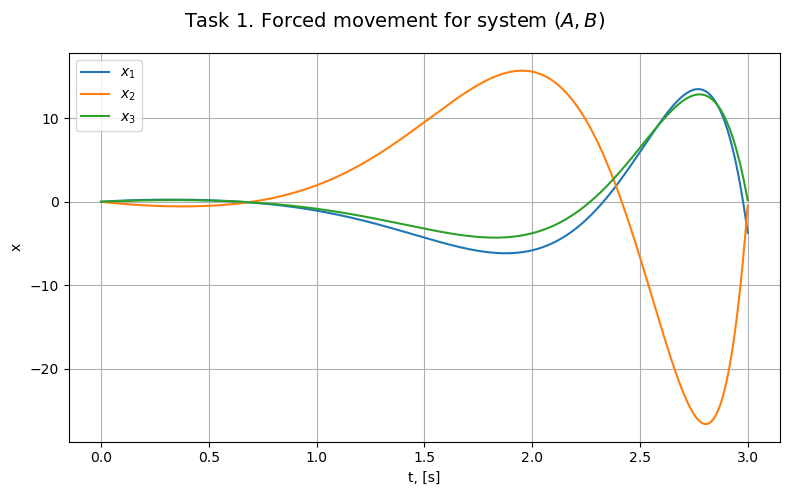

In [52]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle(r"Task 1. Forced movement for system $(A, B)$", fontsize=14)

for j in range(3):
    ax.plot(time_1, sys_out.states[j, :], label=rf"$x_{{{j+1}}}$")

ax.set_xlabel("t, [s]")
ax.set_ylabel("x")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

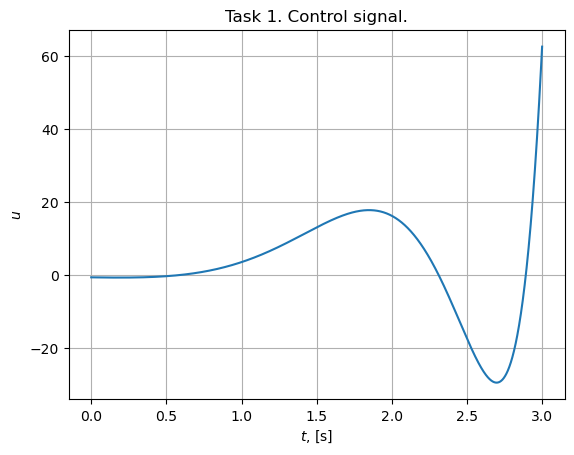

In [53]:
plt.plot(time_1,u_s)
plt.title("Task 1. Control signal.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$u$")
plt.grid()

## Task 2 (Another research on controllability)

In [54]:
A = np.array([
    [7, -7, 8],
    [6, -5, 6],
    [-6, 4, -7]
])

B = np.array([
    [3],
    [-1],
    [1]
])

x_1_hat = np.array([
    [-8],
    [3],
    [0]
])

x_2_hat = np.array([
    [-4],
    [0],
    [0]
])

### Subtask 2.1

In [55]:
U = np.concatenate([B, A.dot(B), A.dot(A.dot(B))],axis=1)
U

array([[   3,   36, -183],
       [  -1,   29, -103],
       [   1,  -29,  103]])

In [59]:
np.linalg.matrix_rank(U)

2

In [57]:
np.linalg.matrix_rank(np.concatenate([U, x_1_hat],axis=1))

3

In [58]:
np.linalg.matrix_rank(np.concatenate([U, x_2_hat],axis=1))

2

### Subtask 2.2

In [61]:
eigenvalues, eigenvectors = scipy.linalg.eig(A)

print("Eigen values matrix A:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"λ_{i+1} = {eigenvalue}")

for i, eigenvalue in enumerate(eigenvalues):
    H = np.hstack((A - eigenvalue * np.eye(3), B))
    rank = np.linalg.matrix_rank(H)
    
    print(f"\nMatrix Hautus for λ_{i+1} = {eigenvalue}:")
    print(H)
    print(f"Rank matrix Hautus: {rank}")
    
    if rank == 3:
        print(f"System is controllable for λ_{i+1} = {eigenvalue}.")
    else:
        print(f"System is not controllable for λ_{i+1} = {eigenvalue}.")

Eigen values matrix A:
λ_1 = (-1.9999999999999982+3.0000000000000004j)
λ_2 = (-1.9999999999999982-3.0000000000000004j)
λ_3 = (-1+0j)

Matrix Hautus for λ_1 = (-1.9999999999999982+3.0000000000000004j):
[[ 9.-3.j -7.+0.j  8.+0.j  3.+0.j]
 [ 6.+0.j -3.-3.j  6.+0.j -1.+0.j]
 [-6.+0.j  4.+0.j -5.-3.j  1.+0.j]]
Rank matrix Hautus: 3
System is controllable for λ_1 = (-1.9999999999999982+3.0000000000000004j).

Matrix Hautus for λ_2 = (-1.9999999999999982-3.0000000000000004j):
[[ 9.+3.j -7.+0.j  8.+0.j  3.+0.j]
 [ 6.+0.j -3.+3.j  6.+0.j -1.+0.j]
 [-6.+0.j  4.+0.j -5.+3.j  1.+0.j]]
Rank matrix Hautus: 3
System is controllable for λ_2 = (-1.9999999999999982-3.0000000000000004j).

Matrix Hautus for λ_3 = (-1+0j):
[[ 8.+0.j -7.+0.j  8.+0.j  3.+0.j]
 [ 6.+0.j -4.+0.j  6.+0.j -1.+0.j]
 [-6.+0.j  4.+0.j -6.+0.j  1.+0.j]]
Rank matrix Hautus: 2
System is not controllable for λ_3 = (-1+0j).


### Subtask 2.3

In [62]:
A_sym = sympy.Matrix(A)
B_sym = sympy.Matrix(B)
P, J = A_sym.jordan_form()
J

Matrix([
[-1,        0,        0],
[ 0, -2 - 3*I,        0],
[ 0,        0, -2 + 3*I]])

In [63]:
P

Matrix([
[-1, -3/2 + I/2, -3/2 - I/2],
[ 0,         -1,         -1],
[ 1,          1,          1]])

In [64]:
for eigenvalue in eigenvalues:
    H = np.hstack((A - eigenvalue * np.eye(3), B))
    rank = np.linalg.matrix_rank(H)

    print(f"Rank matrix Hautus for λ = {eigenvalue}: {rank}")
    
    if rank == 3:
        print(f"System is contrallable for λ_{i+1} = {eigenvalue}.")
    else:
        print(f"System is not controllable for λ_{i+1} = {eigenvalue}.")

Rank matrix Hautus for λ = (-1.9999999999999982+3.0000000000000004j): 3
System is contrallable for λ_3 = (-1.9999999999999982+3.0000000000000004j).
Rank matrix Hautus for λ = (-1.9999999999999982-3.0000000000000004j): 3
System is contrallable for λ_3 = (-1.9999999999999982-3.0000000000000004j).
Rank matrix Hautus for λ = (-1+0j): 2
System is not controllable for λ_3 = (-1+0j).


In [65]:
P.inv() @ B_sym

Matrix([
[          0],
[1/2 - 9*I/2],
[1/2 + 9*I/2]])

$\lambda_1$ = -1 is non controllable

### Subtask 2.4

In [73]:
G_cont_2 = grammian_cont_scipy(A_sym, B_sym, 3)
G_cont_2.simplify()
G_cont_2

Matrix([
[ 23.2921141833767,  11.1588780992779, -11.1588780992779],
[ 11.1588780992779,  6.13613248717239, -6.13613248717239],
[-11.1588780992779, -6.13613248717239,  6.13613248717239]])

In [74]:
G_cont_2.evalf().eigenvals()

{34.4974637320578: 1, 1.06691542566369: 1, -6.86099052311234e-32: 1}

In [75]:
G_cont_2.evalf().det()

0

### Subtask 2.5

In [71]:
x_1_sym_2 = sympy.Matrix(x_1_hat)
x_1_sym_2

Matrix([
[-8],
[ 3],
[ 0]])

In [76]:
u_2 = B_sym.T @ sympy.exp(A_sym.T * (3 - t)) @ G_cont_2.evalf().pinv() @ x_1_sym_2
u_2

Matrix([[-8.14069868068838*exp(2*t - 6)*sin(3*t - 9) - 17.1997609969953*exp(2*t - 6)*cos(3*t - 9)]])

In [79]:
u_f_2 = lambdify(t,u_2[0,0],'numpy')
system_2 = ctrl.ss(A,B,[0,0,0],0)

system_2

<LinearIOSystem:sys[3]:['u[0]']->['y[0]']>

In [80]:
time_2 = np.linspace(0,3,int(3/dt))
u_s_2 = u_f_2(time_2)
sys_out_2 = ctrl.forced_response(system_2,U=u_s_2,X0=0,T=time_2)

sys_out_2.states[:,-1]

array([-11.05487174,  -0.24850137,   0.24850137])

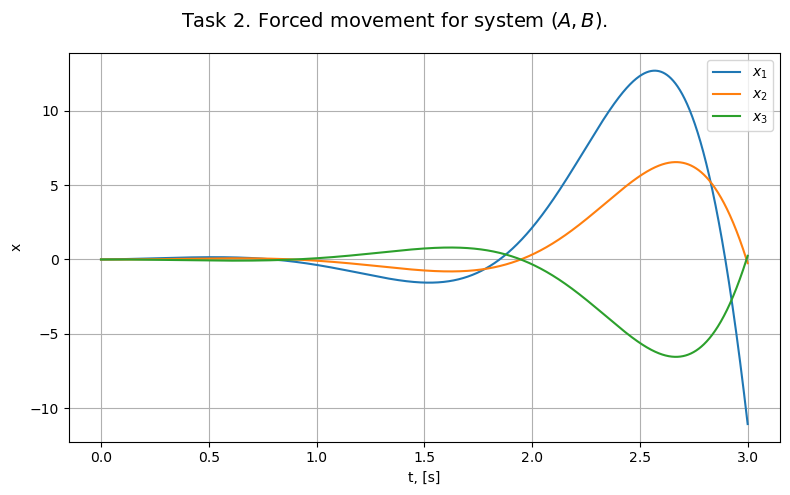

In [110]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle(f"Task 2. Forced movement for system $(A, B)$.", fontsize=14)

for j in range(3):
    ax.plot(time_2, sys_out_2.states[j,:], label=rf"$x_{{{j+1}}}$")

ax.set_xlabel("t, [s]")
ax.set_ylabel("x")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

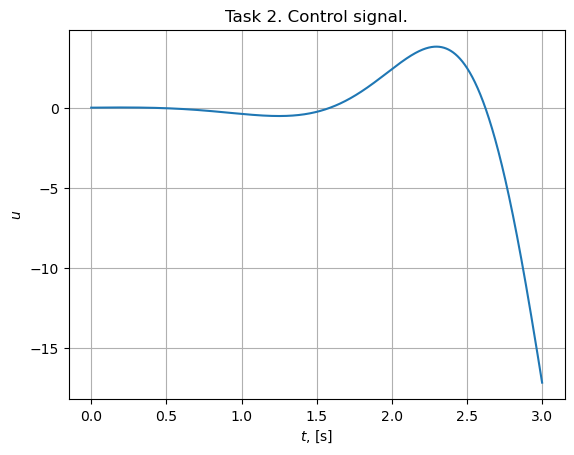

In [83]:
plt.plot(time_1,u_s_2)
plt.title("Task 2. Control signal.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$u$")
plt.grid()

## Task 3 (Research observability)

In [84]:
A = np.array([
    [-8, -3, -12],
    [-3, -2, -6],
    [6, 0, 7]
])

C = np.array([[1, 0, 2]])

y = 2 * sympy.exp(-2*t)*sympy.cos(3*t) + sympy.exp(-2*t)*sympy.sin(3*t)

In [85]:
y


exp(-2*t)*sin(3*t) + 2*exp(-2*t)*cos(3*t)

### Subtask 3.1.1

In [86]:
V = np.concatenate([C,C@A,C@A@A])
V

array([[  1,   0,   2],
       [  4,  -3,   2],
       [-11,  -6, -16]])

In [87]:
np.linalg.matrix_rank(V)

3

System is fully observable

### Subtask 3.1.2

In [90]:
A_sym = sympy.Matrix(A)
C_sym = sympy.Matrix(C)
P, J = A_sym.jordan_form()
J

Matrix([
[1,        0,        0],
[0, -2 - 3*I,        0],
[0,        0, -2 + 3*I]])

In [94]:
P

Matrix([
[-1, -3/2 - I/2, -3/2 + I/2],
[-1, -1/2 - I/2, -1/2 + I/2],
[ 1,          1,          1]])

In [91]:
eigenvalues, eigenvectors = scipy.linalg.eig(A)

print("Eigen values matrix A:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"λ_{i+1} = {eigenvalue}")

for i, eigenvalue in enumerate(eigenvalues):
    H = np.hstack((A - eigenvalue * np.eye(3), B))
    rank = np.linalg.matrix_rank(H)
    
    print(f"\nMatrix Hautus for λ_{i+1} = {eigenvalue}:")
    print(H)
    print(f"Rank matrix Hautus: {rank}")
    
    if rank == 3:
        print(f"System is contrоllable for λ_{i+1} = {eigenvalue}.")
    else:
        print(f"System is not controllable for λ_{i+1} = {eigenvalue}.")

Eigen values matrix A:
λ_1 = (-1.9999999999999967+3.0000000000000018j)
λ_2 = (-1.9999999999999967-3.0000000000000018j)
λ_3 = (0.9999999999999986+0j)

Matrix Hautus for λ_1 = (-1.9999999999999967+3.0000000000000018j):
[[-6.00000000e+00-3.j -3.00000000e+00+0.j -1.20000000e+01+0.j
   3.00000000e+00+0.j]
 [-3.00000000e+00+0.j -3.33066907e-15-3.j -6.00000000e+00+0.j
  -1.00000000e+00+0.j]
 [ 6.00000000e+00+0.j  0.00000000e+00+0.j  9.00000000e+00-3.j
   1.00000000e+00+0.j]]
Rank matrix Hautus: 3
System is contrоllable for λ_1 = (-1.9999999999999967+3.0000000000000018j).

Matrix Hautus for λ_2 = (-1.9999999999999967-3.0000000000000018j):
[[-6.00000000e+00+3.j -3.00000000e+00+0.j -1.20000000e+01+0.j
   3.00000000e+00+0.j]
 [-3.00000000e+00+0.j -3.33066907e-15+3.j -6.00000000e+00+0.j
  -1.00000000e+00+0.j]
 [ 6.00000000e+00+0.j  0.00000000e+00+0.j  9.00000000e+00+3.j
   1.00000000e+00+0.j]]
Rank matrix Hautus: 3
System is contrоllable for λ_2 = (-1.9999999999999967-3.0000000000000018j).

Matrix

In [93]:
C @ P

Matrix([[1, 1/2 - I/2, 1/2 + I/2]])

### Subtask 3.2

In [98]:
G_obs = grammian_obs_scipy(A, C, 3)
G_obs = G_obs[0]
G_obs

array([[ 201.92404873, -201.35756973,  202.09243268],
       [-201.35756973,  201.15647369, -201.30480108],
       [ 202.09243268, -201.30480108,  202.42427698]])

In [99]:
np.linalg.eigvals(G_obs)

array([6.05006021e+02, 7.27604271e-03, 4.91502737e-01])

### Subtask 3.3

In [104]:
G_obs_sym = sympy.Matrix(G_obs)
G_obs_sym

Matrix([
[ 201.924048730672, -201.357569727718,  202.092432683594],
[-201.357569727718,  201.156473690905, -201.304801081355],
[ 202.092432683594, -201.304801081355,  202.424276984702]])

In [105]:
func = lambda x : scipy.linalg.expm(A.T*x) @ C.T * float(sympy.N(y.subs({t: x})))
x_0 = np.linalg.inv(G_obs) @ scipy.integrate.quad_vec(func,0,3)[0]

x_0

array([[1.33050438e-12],
       [1.00000000e+00],
       [1.00000000e+00]])

In [106]:
system_3 = ctrl.ss(A,[[0],[0],[0]],C,0)
system_3

<LinearIOSystem:sys[4]:['u[0]']->['y[0]']>

In [107]:
time_3 = np.linspace(0,3,int(3/dt))
u_s_3 = np.zeros_like(time_3)
sys_out_3 = ctrl.forced_response(system_3,U=u_s_3,X0=x_0,T=time_3)

sys_out_3.states[:,0]

array([1.33050438e-12, 1.00000000e+00, 1.00000000e+00])

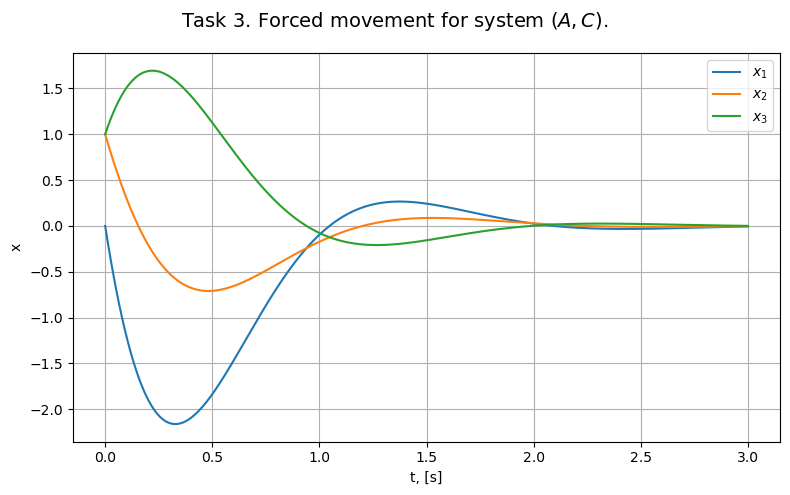

In [109]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle(f"Task 3. Forced movement for system $(A, C)$.", fontsize=14)

for j in range(3):
    ax.plot(time_3, sys_out_3.states[j,:], label=rf"$x_{{{j+1}}}$")

ax.set_xlabel("t, [s]")
ax.set_ylabel("x")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

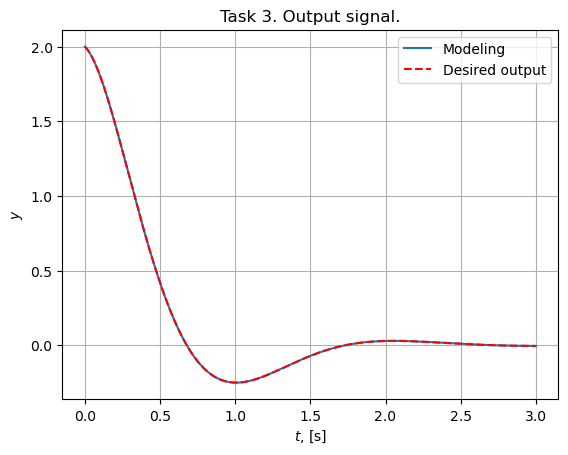

In [111]:
y_func = lambdify(t,y,"numpy")

plt.plot(time_3,sys_out_3.outputs,label="Modeling")
plt.plot(time_3,y_func(time_3),"r--",label="Desired output")
plt.title("Task 3. Output signal.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$y$")
plt.grid()
plt.legend()

## Task 4 (Another research observability)

In [153]:
A = np.array([
    [-18, -47, -9],
    [8, 19, 2],
    [-3, -11, -4]
])

C = np.array([[0, -7, -7]])

y = 2 * sympy.exp(-2*t)*sympy.cos(3*t) + sympy.exp(-2*t)*sympy.sin(3*t)

In [154]:
y

exp(-2*t)*sin(3*t) + 2*exp(-2*t)*cos(3*t)

### Subtask 4.1

In [155]:
V = np.concatenate([C,C@A,C@A@A])
V

array([[  0,  -7,  -7],
       [-35, -56,  14],
       [140, 427, 147]])

In [156]:
sympy.Matrix(V).nullspace()

[Matrix([
 [ 2],
 [-1],
 [ 1]])]

In [157]:
np.linalg.matrix_rank(V)

2

System is not fully observable

### Subtask 4.2

In [158]:
A_sym = sympy.Matrix(A)
C_sym = sympy.Matrix(C)
P, J = A_sym.jordan_form()
J

Matrix([
[1,        0,        0],
[0, -2 - 5*I,        0],
[0,        0, -2 + 5*I]])

In [159]:
P

Matrix([
[ 2, 3 - 2*I, 3 + 2*I],
[-1,  -1 + I,  -1 - I],
[ 1,       1,       1]])

In [160]:
eigenvalues, eigenvectors = scipy.linalg.eig(A)

print("Eigen values matrix A:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"λ_{i+1} = {eigenvalue}")

for i, eigenvalue in enumerate(eigenvalues):
    H = np.hstack((A - eigenvalue * np.eye(3), B))
    rank = np.linalg.matrix_rank(H)
    
    print(f"\nMatrix Hautus for λ_{i+1} = {eigenvalue}:")
    print(H)
    print(f"Rank matrix Hautus: {rank}")
    
    if rank == 3:
        print(f"System is contrоllable for λ_{i+1} = {eigenvalue}.")
    else:
        print(f"System is not controllable for λ_{i+1} = {eigenvalue}.")

Eigen values matrix A:
λ_1 = (-1.9999999999999938+5.000000000000011j)
λ_2 = (-1.9999999999999938-5.000000000000011j)
λ_3 = (0.999999999999996+0j)

Matrix Hautus for λ_1 = (-1.9999999999999938+5.000000000000011j):
[[-16.-5.j -47.+0.j  -9.+0.j   3.+0.j]
 [  8.+0.j  21.-5.j   2.+0.j  -1.+0.j]
 [ -3.+0.j -11.+0.j  -2.-5.j   1.+0.j]]
Rank matrix Hautus: 3
System is contrоllable for λ_1 = (-1.9999999999999938+5.000000000000011j).

Matrix Hautus for λ_2 = (-1.9999999999999938-5.000000000000011j):
[[-16.+5.j -47.+0.j  -9.+0.j   3.+0.j]
 [  8.+0.j  21.+5.j   2.+0.j  -1.+0.j]
 [ -3.+0.j -11.+0.j  -2.+5.j   1.+0.j]]
Rank matrix Hautus: 3
System is contrоllable for λ_2 = (-1.9999999999999938-5.000000000000011j).

Matrix Hautus for λ_3 = (0.999999999999996+0j):
[[-19.+0.j -47.+0.j  -9.+0.j   3.+0.j]
 [  8.+0.j  18.+0.j   2.+0.j  -1.+0.j]
 [ -3.+0.j -11.+0.j  -5.+0.j   1.+0.j]]
Rank matrix Hautus: 2
System is not controllable for λ_3 = (0.999999999999996+0j).


In [161]:
C @ P

Matrix([[0, -7*I, 7*I]])

### Subtask 4.3

In [162]:
G_obs = grammian_obs_scipy(A,C,3)
G_obs = G_obs[0]
G_obs

array([[ 5.2801484 , 12.6723689 ,  2.11207209],
       [12.6723689 , 36.53865831, 11.19392052],
       [ 2.11207209, 11.19392052,  6.96977633]])

In [163]:
np.linalg.eigvals(G_obs)

array([ 4.44202205e+01, -1.91476914e-15,  4.36836258e+00])

### Subtask 4.4

In [164]:
G_obs_sym = sympy.Matrix(G_obs)
G_obs_sym

Matrix([
[5.28014840286749, 12.6723688982058, 2.11207209247079],
[12.6723688982057, 36.5386583118842, 11.1939205154728],
[2.11207209247077, 11.1939205154727, 6.96977633053119]])

In [165]:
func = lambda x : scipy.linalg.expm(A.T*x) @ C.T * float(sympy.N(y.subs({t: x})))
x_0 = np.linalg.pinv(G_obs) @ scipy.integrate.quad_vec(func,0,3)[0]

In [166]:
x_0

array([[-0.04685787],
       [-0.12685728],
       [-0.03314155]])

### Subtask 4.5

In [167]:
system_4 = ctrl.ss(A,[[0],[0],[0]],C,0)
system_4

<LinearIOSystem:sys[7]:['u[0]']->['y[0]']>

In [168]:
time_4 = np.linspace(0,3,int(3/dt))
u_s_4 = np.zeros_like(time_4)
sys_out_4 = ctrl.forced_response(system_4,U=u_s_4,X0=x_0,T=time_4)

sys_out_4.states[:,0]

array([-0.04685787, -0.12685728, -0.03314155])

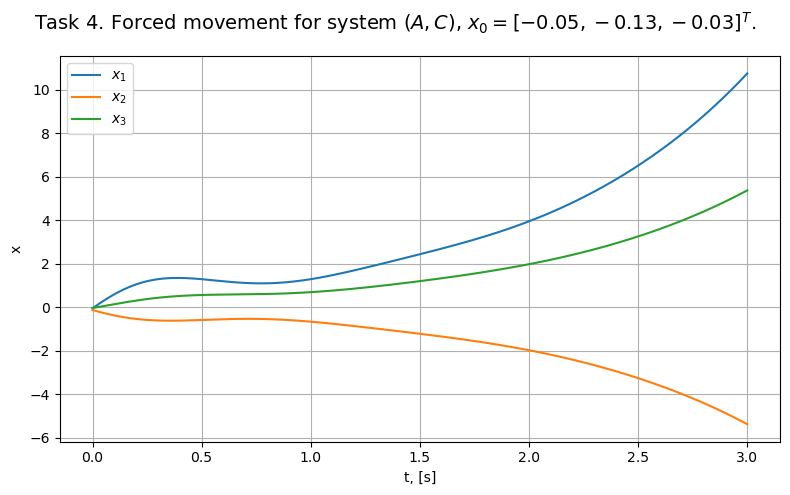

In [171]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle(f"Task 4. Forced movement for system $(A, C)$, $x_0=[-0.05,-0.13,-0.03]^T$.", fontsize=14)

for j in range(3):
    ax.plot(time_4, sys_out_4.states[j,:], label=rf"$x_{{{j+1}}}$")

ax.set_xlabel("t, [s]")
ax.set_ylabel("x")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

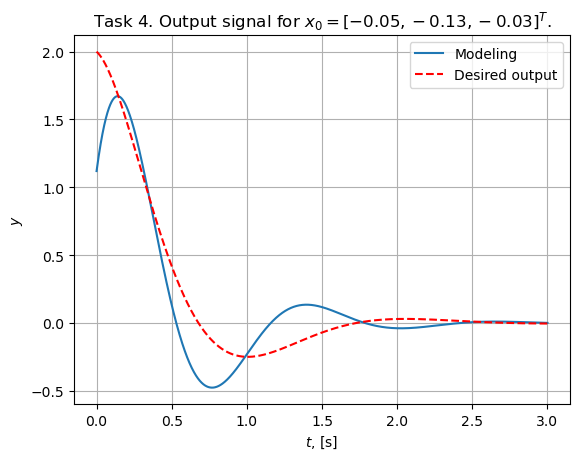

In [172]:
y_func = lambdify(t,y,"numpy")

plt.plot(time_4,sys_out_4.outputs,label="Modeling")
plt.plot(time_4,y_func(time_4),"r--",label="Desired output")
plt.title("Task 4. Output signal for $x_0=[-0.05,-0.13,-0.03]^T$.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$y$")
plt.grid()
plt.legend()

In [181]:
sys_out_4 = ctrl.forced_response(system_4,U=u_s_4,X0=x_0+5*np.array([2,-1,1]).reshape((-1,1)),T=time_4)

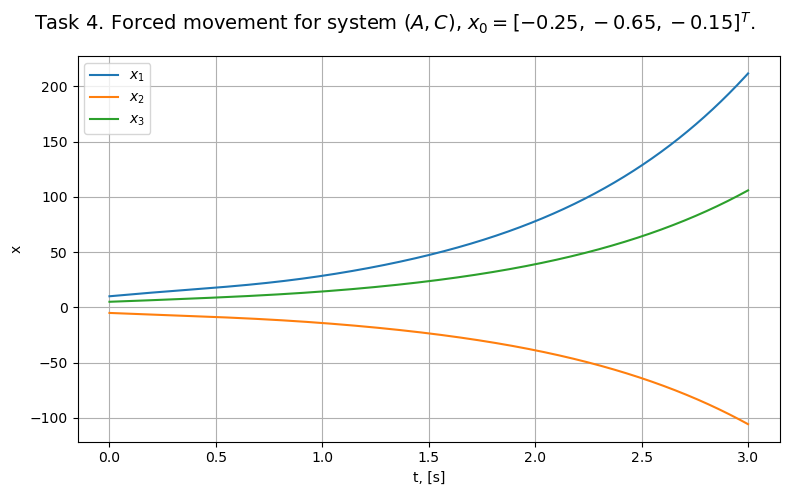

In [180]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle(f"Task 4. Forced movement for system $(A, C)$, $x_0=[-0.25,-0.65,-0.15]^T$.", fontsize=14)

for j in range(3):
    ax.plot(time_4, sys_out_4.states[j,:], label=rf"$x_{{{j+1}}}$")

ax.set_xlabel("t, [s]")
ax.set_ylabel("x")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

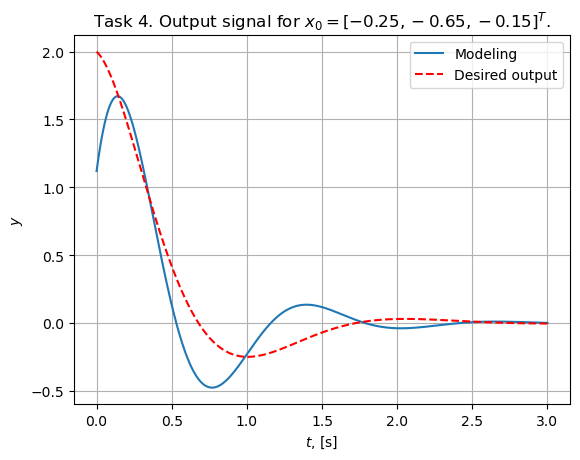

In [183]:
plt.plot(time_4,sys_out_4.outputs,label="Modeling")
plt.plot(time_4,y_func(time_4),"r--",label="Desired output")
plt.title("Task 4. Output signal for $x_0=[-0.25,-0.65,-0.15]^T$.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$y$")
plt.grid()
plt.legend()

In [186]:
sys_out_4 = ctrl.forced_response(system_4,U=u_s_4,X0=x_0-50*np.array([2,-1,1]).reshape((-1,1)),T=time_4)

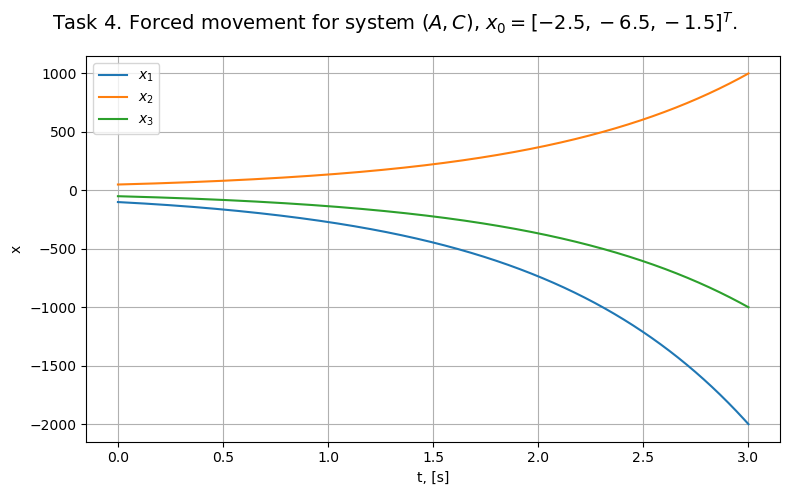

In [187]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle(f"Task 4. Forced movement for system $(A, C)$, $x_0=[-2.5,-6.5,-1.5]^T$.", fontsize=14)

for j in range(3):
    ax.plot(time_4, sys_out_4.states[j,:], label=rf"$x_{{{j+1}}}$")

ax.set_xlabel("t, [s]")
ax.set_ylabel("x")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

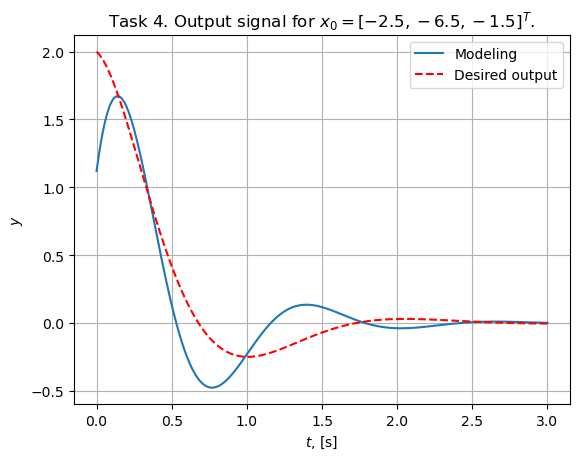

In [188]:
plt.plot(time_4,sys_out_4.outputs,label="Modeling")
plt.plot(time_4,y_func(time_4),"r--",label="Desired output")
plt.title("Task 4. Output signal for $x_0=[-2.5,-6.5,-1.5]^T$.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$y$")
plt.grid()
plt.legend()

## Task 5 (Research controllability on exit)

In [202]:
# A = np.array([
#     [0, 4, 2],
#     [-4, -8, -4],
#     [4, 4, 0]
# ])

# B = np.array([
#     [3],
#     [-1],
#     [1]
# ])

# C = np.array([
#     [0, 3, 3],
#     [0, 0, 2]
# ])

A = np.array([
    [5, -2, 8],
    [4, -3, 4],
    [4, 4, 0]
])

B = np.array([
    [-1],
    [-3],
    [1]
])

C = np.array([
    [0, 3, 5],
    [0, 14, 9]
])

In [209]:
A_sym = sympy.Matrix(A)
B_sym = sympy.Matrix(B)
C_sym = sympy.Matrix(C)
P, J = A_sym.jordan_form()
J

Matrix([
[-4,        0,        0],
[ 0, -2 - 2*I,        0],
[ 0,        0, -2 + 2*I]])

In [210]:
P

Matrix([
[-1, 1/2 - I/2, 1/2 + I/2],
[ 1,        -1,        -1],
[ 0,         1,         1]])

In [211]:
U = np.concatenate([B, A.dot(B), A.dot(A.dot(B))],axis=1)
U

array([[  3,  -2, -16],
       [ -1,  -8,  40],
       [  1,   8, -40]])

In [206]:
np.linalg.matrix_rank(U)

2

In [208]:
P.inv() @ B_sym

Matrix([
[          0],
[1/2 + 5*I/2],
[1/2 - 5*I/2]])

In [212]:
C @ P

Matrix([
[3, 0, 0],
[0, 2, 2]])

In [214]:
import sympy

# ---------------------------------------------------------
# 1. Определяем матрицы A, B, C (ваш вариант).
# ---------------------------------------------------------
A = sympy.Matrix([
    [0, 4, 2],
    [-4, -8, -4],
    [4, 4, 0]
])
B = sympy.Matrix([
    [3],
    [-1],
    [1]
])
C = sympy.Matrix([
    [0, 3, 3],
    [0, 0, 2]
])
# Пусть D изначально нулевая (p=2, m=1)
p = C.shape[0]
m = B.shape[1]
D = sympy.zeros(p, m)

print("A =")
sympy.pprint(A)
print("\nB =")
sympy.pprint(B)
print("\nC =")
sympy.pprint(C)
print("\nD =")
sympy.pprint(D)

# ---------------------------------------------------------
# 2. Собственные числа, жорданова форма (если доступно).
# ---------------------------------------------------------
n = A.shape[0]

# Пытаемся вызвать A.eigenvalues() (если версия позволяет)
try:
    lambdas = A.eigenvalues()
    print("\nСобственные числа (A.eigenvalues()) =", lambdas)
except:
    # Если нет .eigenvalues(), пользуемся .eigenvects()
    eig_data = A.eigenvects()
    lambdas = [ev[0] for ev in eig_data]
    print("\nСобственные числа (из A.eigenvects()) =", lambdas)

# Пытаемся получить Jordan form
try:
    # В некоторых версиях Sympy метод jordan_cells() может работать
    P, J = A.jordan_cells()
    print("\nJordan normal form (возможно, комплексная):")
    print("J =")
    sympy.pprint(J)
    print("P =")
    sympy.pprint(P)
except:
    # Если не получилось
    print("\nНе удалось вызвать A.jordan_cells(). Попробуем A.jordan_form().")
    try:
        J = A.jordan_form()
        print("A.jordan_form() =")
        sympy.pprint(J)
    except:
        print("jordan_form() тоже не поддерживается. Анализируйте вручную.")

# ---------------------------------------------------------
# 3. Управляемость/наблюдаемость (по состоянию).
# ---------------------------------------------------------

# 3.1. Матрица управляемости (Controllability):
C_m = B
for i in range(1, n):
    C_m = C_m.row_join(A**i * B)

rank_C_m = C_m.rank()
print("\nMatrix of state-controllability =")
sympy.pprint(C_m)
print(f"rank(Controllability) = {rank_C_m} / {n}")
if rank_C_m == n:
    print("=> Система полностью управляемая по состоянию.")
else:
    print("=> Система НЕполностью управляемая по состоянию.")

# 3.2. Матрица наблюдаемости (Observability):
O_m = C
for i in range(1, n):
    O_m = O_m.col_join(C*(A**i))

rank_O_m = O_m.rank()
print("\nMatrix of state-observability =")
sympy.pprint(O_m)
print(f"rank(Observability) = {rank_O_m} / {n}")
if rank_O_m == n:
    print("=> Система полностью наблюдаемая по состоянию.")
else:
    print("=> Система НЕполностью наблюдаемая по состоянию.")

# ---------------------------------------------------------
# 4. Проверка управляемости/наблюдаемости каждого собственного числа
# ---------------------------------------------------------
for lam in lambdas:
    # Матрица [lambda I - A | B]
    big_mat = (lam*sympy.eye(n) - A).row_join(B)
    r_big = big_mat.rank()
    print(f"\nEigenvalue = {lam}, rank([[lambda I - A], B]) = {r_big}, out of {n}")
    if r_big == n:
        print(" => Собственное число УПРАВЛЯЕМО (controllable).")
    else:
        print(" => Собственное число НЕуправляемо.")

    # Наблюдаемость данного (lam):
    # воспользуемся col_join
    mat_obs = (lam*sympy.eye(n) - A).col_join(C)
    r_obs = mat_obs.rank()
    print(f" rank( (lambda I - A); C ) = {r_obs}, out of {n}")
    if r_obs == n:
        print(" => Собственное число НАБЛЮДАЕМО (observable).")
    else:
        print(" => Собственное число НЕнаблюдаемо.")

# ---------------------------------------------------------
# 5. Управляемость по выходу (Output Controllability), D=0
#    Формируем [C B, C A B, ..., C A^{n-1} B ]
# ---------------------------------------------------------
C_out = C*B
for i in range(1, n):
    C_out = C_out.row_join(C*(A**i * B))

rank_C_out = C_out.rank()
print("\nMatrix of output controllability (C_out) =")
sympy.pprint(C_out)
print(f"rank(C_out) = {rank_C_out}, p = {p}")
if rank_C_out == p:
    print("=> Система ПОЛНОСТЬЮ управляемая по выходу (все компоненты y).")
else:
    print("=> Система НЕполностью управляемая по выходу.")

# ---------------------------------------------------------
# 6. Предложить матрицу D != 0, чтобы улучшить управляемость по выходу
# ---------------------------------------------------------
# Пример: D_new = [[1],[0]] (размер 2x1)
D_new = sympy.Matrix([
    [1],
    [0]
])
print("\nProposed D_new =")
sympy.pprint(D_new)

C_out_mod = C*B
for i in range(1, n):
    C_out_mod = C_out_mod.row_join(C*(A**i * B))
# «Приклеим» D_new как дополнительный столбец
C_out_mod = C_out_mod.row_join(D_new)

rank_C_out_mod = C_out_mod.rank()
print(f"Rank with D_new included = {rank_C_out_mod} vs p = {p}")
if rank_C_out_mod == p:
    print("=> Удалось обеспечить полную управляемость по выходу добавлением D_new.")
else:
    print("=> Ранг всё ещё < p, возможно, нужна другая D или более сложный подход.")


A =
⎡0   4   2 ⎤
⎢          ⎥
⎢-4  -8  -4⎥
⎢          ⎥
⎣4   4   0 ⎦

B =
⎡3 ⎤
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎣1 ⎦

C =
⎡0  3  3⎤
⎢       ⎥
⎣0  0  2⎦

D =
⎡0⎤
⎢ ⎥
⎣0⎦

Собственные числа (из A.eigenvects()) = [-4, -2 - 2*I, -2 + 2*I]

Jordan normal form (возможно, комплексная):
J =
[[-4], [-2 - 2⋅ⅈ], [-2 + 2⋅ⅈ]]
P =
⎡    1   ⅈ  1   ⅈ⎤
⎢-1  ─ - ─  ─ + ─⎥
⎢    2   2  2   2⎥
⎢                ⎥
⎢1    -1     -1  ⎥
⎢                ⎥
⎣0     1      1  ⎦

Matrix of state-controllability =
⎡3   -2  -16⎤
⎢           ⎥
⎢-1  -8  40 ⎥
⎢           ⎥
⎣1   8   -40⎦
rank(Controllability) = 2 / 3
=> Система НЕполностью управляемая по состоянию.

Matrix of state-observability =
⎡ 0    3    3 ⎤
⎢             ⎥
⎢ 0    0    2 ⎥
⎢             ⎥
⎢ 0   -12  -12⎥
⎢             ⎥
⎢ 8    8    0 ⎥
⎢             ⎥
⎢ 0   48   48 ⎥
⎢             ⎥
⎣-32  -32  -16⎦
rank(Observability) = 3 / 3
=> Система полностью наблюдаемая по состоянию.

Eigenvalue = -4, rank([[lambda I - A], B]) = 2, out of 3
 => Собственное число НЕуправляемо.
 ran